# Part 1 excersize 2

Epoch 1/10, Loss: 0.3048, Test Accuracy: 0.9733
Epoch 2/10, Loss: 0.1755, Test Accuracy: 0.9747
Epoch 3/10, Loss: 0.1614, Test Accuracy: 0.9748
Epoch 4/10, Loss: 0.1543, Test Accuracy: 0.9757
Epoch 5/10, Loss: 0.1484, Test Accuracy: 0.9797
Epoch 6/10, Loss: 0.1455, Test Accuracy: 0.9799
Epoch 7/10, Loss: 0.1435, Test Accuracy: 0.9786
Epoch 8/10, Loss: 0.1493, Test Accuracy: 0.9786
Epoch 9/10, Loss: 0.1500, Test Accuracy: 0.9764
Epoch 10/10, Loss: 0.1449, Test Accuracy: 0.9798


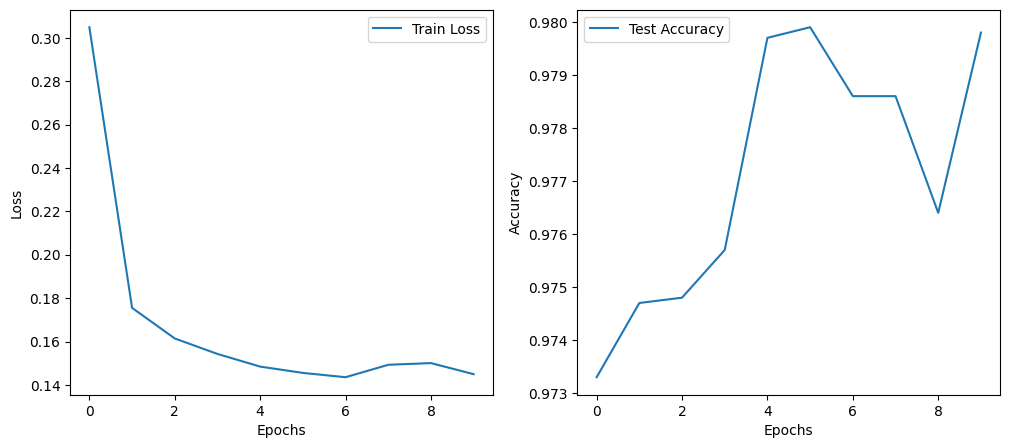

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameters
batch_size = 64
learning_rate = 0.01
epochs = 10
dropout_rate = 0.5
num_filters = 32  # Change this to increase/decrease complexity

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# Define CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, num_filters, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(num_filters, num_filters*2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(num_filters*2*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(dropout_rate)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, num_filters*2*7*7)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Training function
def train(model, trainloader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)  # Move to appropriate device
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(trainloader)

# Testing function
def test(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)  # Move to appropriate device
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Train and evaluate the model
model = CNN().to(device)  # Move model to the appropriate device
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
test_accuracies = []

for epoch in range(epochs):
    train_loss = train(model, trainloader, criterion, optimizer)
    test_acc = test(model, testloader)
    train_losses.append(train_loss)
    test_accuracies.append(test_acc)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot training loss and test accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
